<a href="https://colab.research.google.com/github/samuel-zahner/Intro-to-AI/blob/main/FireMaze_A__updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#%matplotlib inlin
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import random


In [4]:
#** code for plotting **

step_size = 10
start_color = np.array([0,0,255]) #blue
goal_color = np.array([0,255,0]) #green
fire_color = np.array([0,0,0])#black
neighbor_color = np.array([220,220,220])#gray
fringe_color = np.array([128,128,128])#yellow
explored_color = np.array([255,0,0])#red
node_color = np.array([255,165,0])#orange

def plot_fire(fire_set, dim):
    fig = plt.figure()

    prob_map = np.zeros((step_size*dim,step_size*dim,3)).astype(int) + 255
    # add grid
    prob_map[step_size-1::step_size,:,:] = 0
    prob_map[:,step_size-1::step_size,:] = 0


    prob_map[0:step_size-1,:step_size-1] = start_color
    prob_map[step_size*(dim-1):step_size*(dim-1)+step_size-1,step_size*(dim-1):step_size*(dim-1)+step_size-1] = goal_color
    plt.xticks([], [])
    plt.yticks([], [])
    
    for i in range(dim):
        for j in range(dim):
            if (i,j) in fire_set:
                prob_map[step_size*i:step_size*i + step_size-1, step_size*j:step_size*j + step_size-1] = fire_color
    plt.imshow(prob_map)
    
def node_plot(prob_map, node, color, alpha=1.0):
    prob_map[node[0]*step_size:node[0]*step_size+step_size-1,node[1]*step_size:node[1]*step_size+step_size-1] = color*alpha
    
    
def path_plot(path, dim, fire_set):
    # plot given the info as listed 
    #fig = plt.figure()
    prob_map = np.zeros((step_size*dim,step_size*dim,3)).astype(int) + 255
    # add grid
    prob_map[step_size-1::step_size,:,:] = 0
    prob_map[:,step_size-1::step_size,:] = 0
    
    for i in range(dim):
        for j in range(dim):
            if (i,j) in fire_set:
                prob_map[step_size*i:step_size*i + step_size-1, step_size*j:step_size*j + step_size-1] = fire_color

    for i in range(len(path)):
        node = path[i]
        node_plot(prob_map, node, node_color, alpha=i/len(path)+1.0)

    prob_map[0:step_size-1,:step_size-1] = start_color
    prob_map[step_size*(dim-1):step_size*(dim-1)+step_size-1,step_size*(dim-1):step_size*(dim-1)+step_size-1] = goal_color


    plt.xticks([], [])
    plt.yticks([], [])

    img = plt.imshow(prob_map)
    return img

In [5]:
def dfs_search(dim, fire_set):
    transitions = [(0,-1),(-1,0),(0,1),(1,0)]
    start = (0,0)
    goal = (dim-1, dim-1)
    explored_spaces = set([])
    fringe = [(start, [])]
    #imgs = []
    #fig = plt.figure()
    win_flag = False

    #parent_map = [[(0,0) for i in range(dim)] for i in range(dim)]
    #parent_fringe = [(-1,-1)]

    while len(fringe) > 0:
        node, path = fringe.pop(-1)
    
        if node in explored_spaces:
            continue
        if node in fire_set:
            continue
        
        path.append(node)
    
        if node[0] == goal[0] and node[1] == goal[1]:
            print("You have found the goal")
            win_flag = True
            break
        
    
        for i in range(len(transitions)):
            dy, dx = transitions[i]
        
            x = node[0] + dx
            y = node[1] + dy
        
            if x < 0 or y < 0 or x > dim-1 or y > dim-1:
                continue
            if (x,y) in explored_spaces:
                continue
            if (x,y) in fire_set:
                continue
            if (x,y) not in fringe:
                fringe.append(((x,y), path[:]))
    
        explored_spaces.add(node)
        
    if win_flag == False:
        print("There is no path from start to goal")
        return
    
    
    print("Path length: " + str(len(path)-1))
    path_plot(path, dim, fire_set)
    return True

In [4]:
def bfs_search(dim, fire_matrix):
    transitions = [(0,-1),(-1,0),(0,1),(1,0)]
    start = (0,0)
    goal = (dim-1, dim-1)
    explored_spaces = set([])
    fringe = [(start, [])]
    win_flag = False


    while len(fringe) > 0:
        node, shortest_path = fringe.pop(0)
        
    
        if node in explored_spaces:
            continue
        if node in fire_set:
            continue
            
        shortest_path.append(node)
    
        if node[0] == goal[0] and node[1] == goal[1]:
            print("You have found the goal")
            win_flag = True
            break

    
        for i in range(len(transitions)):
            dy, dx = transitions[i]
        
            x = node[0] + dx
            y = node[1] + dy
        
            if x < 0 or y < 0 or x > dim-1 or y > dim-1:
                continue
            if (x,y) in explored_spaces:
                continue
            if (x,y) in fire_set:
                continue
            if (x,y) not in fringe:
                fringe.append(((x,y), shortest_path[:]))
       
    
        explored_spaces.add(node)
        
    if win_flag == False:
        print("There is no path from start to goal")
        return False
    
    
    print("Shortest path: " + str(len(shortest_path)-1))
    path_plot(shortest_path, dim, fire_set)
    return True

Enter dimension of maze: 10
Enter probability of fire: .3


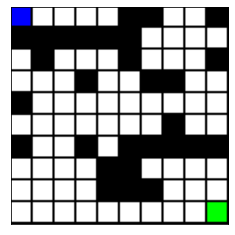

In [6]:
#take input from user
while True:
    try:
        dim = int(input("Enter dimension of maze: "))
        if dim < 3:
            raise ValueError #this will send it to the print message and back to the input option
        break
    except ValueError:
        print("Invalid integer. Dimension must be at least 3.")

while True:
    try:
        p = float(input("Enter probability of fire: "))
        if 9 < 0 or p > 1:
            raise ValueError #this will send it to the print message and back to the input option
        break
    except ValueError:
        print("Invalid integer. Probability must be in the range (0,1).")



#print(dim)
#print(p)

fire_set = set([])
for i in range(dim):
    for j in range(dim):
        if i == 0 and j == 0 or i == dim-1 and j == dim-1:
            continue
        if random.uniform(0,1) < p:
            fire_set.add((i,j))
#print(fire_set)            
plot_fire(fire_set, dim)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 46


True

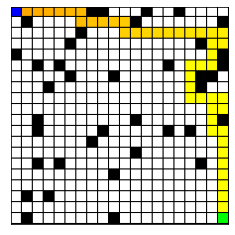

In [15]:
#DFS
dfs_search(dim, fire_set)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Shortest path: 38


True

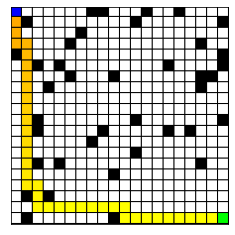

In [16]:
#BFS
bfs_search(dim, fire_set)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

dimension:  4
You have found the goal
Path length: 8
dimension:  4
You have found the goal
Path length: 6
dimension:  4
You have found the goal
Path length: 6
dimension:  5
You have found the goal
Path length: 8
dimension:  5
There is no path from start to goal
dimension:  5
There is no path from start to goal
dimension:  6
You have found the goal
Path length: 10
dimension:  6
There is no path from start to goal
dimension:  6
You have found the goal
Path length: 12
dimension:  7
You have found the goal
Path length: 12
dimension:  7
There is no path from start to goal
dimension:  7
There is no path from start to goal
dimension:  8
There is no path from start to goal
dimension:  8
There is no path from start to goal
dimension:  8
There is no path from start to goal
dimension:  9
There is no path from start to goal
dimension:  9
You have found the goal
Path length: 18
dimension:  9
You have found the goal
Path length: 20
dimension:  10
You have found the goal
Path length: 22
dimension:  1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i


dimension:  21
You have found the goal
Path length: 52
dimension:  21
You have found the goal
Path length: 62
dimension:  22
You have found the goal
Path length: 54
dimension:  22
You have found the goal
Path length: 50
dimension:  22
You have found the goal
Path length: 56
dimension:  23
You have found the goal
Path length: 48
dimension:  23
There is no path from start to goal
dimension:  23
There is no path from start to goal
dimension:  24
You have found the goal
Path length: 56
dimension:  24
You have found the goal
Path length: 58
dimension:  24
You have found the goal
Path length: 60
dimension:  25
There is no path from start to goal
dimension:  25
You have found the goal
Path length: 64
dimension:  25
You have found the goal
Path length: 82
dimension:  26
You have found the goal
Path length: 60
dimension:  26
There is no path from start to goal
dimension:  26
There is no path from start to goal
dimension:  27
There is no path from start to goal
dimension:  27
There is no path f

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

dimension:  30
You have found the goal
Path length: 64
dimension:  31
There is no path from start to goal
dimension:  31
You have found the goal
Path length: 78
dimension:  31
You have found the goal
Path length: 70
dimension:  32
You have found the goal
Path length: 90
dimension:  32
You have found the goal
Path length: 82
dimension:  32
You have found the goal
Path length: 66
dimension:  33
There is no path from start to goal
dimension:  33
There is no path from start to goal
dimension:  33
You have found the goal
Path length: 114
dimension:  34
You have found the goal
Path length: 84
dimension:  34
There is no path from start to goal
dimension:  34
There is no path from start to goal
dimension:  35
There is no path from start to goal
dimension:  35
You have found the goal
Path length: 92
dimension:  35
There is no path from start to goal
dimension:  36
There is no path from start to goal
dimension:  36
There is no path from start to goal
dimension:  36
There is no path from start to

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  38
There is no path from start to goal
dimension:  38
There is no path from start to goal
dimension:  39
There is no path from start to goal
dimension:  39
You have found the goal
Path length: 96
dimension:  39
You have found the goal
Path length: 108
dimension:  40
There is no path from start to goal
dimension:  40
There is no path from start to goal
dimension:  40
There is no path from start to goal
dimension:  41
You have found the goal
Path length: 112
dimension:  41
You have found the goal
Path length: 154
dimension:  41
There is no path from start to goal
dimension:  42
There is no path from start to goal
dimension:  42
There is no path from start to goal
dimension:  42
You have found the goal
Path length: 98
dimension:  43
There is no path from start to goal
dimension:  43
There is no path from start to goal
dimension:  43
You have found the goal
Path length: 110
dimension:  44
You have found the goal
Path length: 112


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  44
There is no path from start to goal
dimension:  44
You have found the goal
Path length: 142
dimension:  45
You have found the goal
Path length: 108
dimension:  45
There is no path from start to goal
dimension:  45
You have found the goal
Path length: 182
dimension:  46
You have found the goal
Path length: 172
dimension:  46
You have found the goal
Path length: 114
dimension:  46
There is no path from start to goal
dimension:  47
You have found the goal
Path length: 182
dimension:  47
There is no path from start to goal
dimension:  47
There is no path from start to goal
dimension:  48


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  48
There is no path from start to goal
dimension:  48
There is no path from start to goal
dimension:  49
There is no path from start to goal
dimension:  49
You have found the goal
Path length: 128
dimension:  49
There is no path from start to goal
dimension:  50
You have found the goal
Path length: 142
dimension:  50
There is no path from start to goal
dimension:  50
You have found the goal
Path length: 178
dimension:  51
You have found the goal
Path length: 142
dimension:  51
There is no path from start to goal
dimension:  51


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  52
There is no path from start to goal
dimension:  52
There is no path from start to goal
dimension:  52
You have found the goal
Path length: 164
dimension:  53
You have found the goal
Path length: 236
dimension:  53
You have found the goal
Path length: 162
dimension:  53
You have found the goal
Path length: 210
dimension:  54
You have found the goal
Path length: 130
dimension:  54
You have found the goal
Path length: 176
dimension:  54
You have found the goal
Path length: 154


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  55
There is no path from start to goal
dimension:  55
There is no path from start to goal
dimension:  55
There is no path from start to goal
dimension:  56
You have found the goal
Path length: 184
dimension:  56
There is no path from start to goal
dimension:  56
There is no path from start to goal
dimension:  57
You have found the goal
Path length: 174


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  57
You have found the goal
Path length: 158
dimension:  57
You have found the goal
Path length: 190
dimension:  58
There is no path from start to goal
dimension:  58
You have found the goal
Path length: 272
dimension:  58
There is no path from start to goal
dimension:  59


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  59
You have found the goal
Path length: 196
dimension:  59
You have found the goal
Path length: 168
dimension:  60
You have found the goal
Path length: 240
dimension:  60
You have found the goal
Path length: 200
dimension:  60
There is no path from start to goal
dimension:  61
There is no path from start to goal
dimension:  61
You have found the goal
Path length: 230


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  61
You have found the goal
Path length: 218
dimension:  62
There is no path from start to goal
dimension:  62
You have found the goal
Path length: 172
dimension:  62
You have found the goal
Path length: 204
dimension:  63
You have found the goal
Path length: 188
dimension:  63


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  63
You have found the goal
Path length: 168
dimension:  64
There is no path from start to goal
dimension:  64
There is no path from start to goal
dimension:  64
You have found the goal
Path length: 182
dimension:  65
You have found the goal
Path length: 174


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  65
There is no path from start to goal
dimension:  65
There is no path from start to goal
dimension:  66
There is no path from start to goal
dimension:  66
You have found the goal
Path length: 174
dimension:  66
You have found the goal
Path length: 172


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  67
You have found the goal
Path length: 182
dimension:  67
There is no path from start to goal
dimension:  67
You have found the goal
Path length: 238
dimension:  68
There is no path from start to goal
dimension:  68
You have found the goal
Path length: 200
dimension:  68
You have found the goal
Path length: 314
dimension:  69
You have found the goal
Path length: 264


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  69
You have found the goal
Path length: 178
dimension:  69
There is no path from start to goal
dimension:  70
There is no path from start to goal
dimension:  70
You have found the goal
Path length: 180


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  70
You have found the goal
Path length: 210
dimension:  71
There is no path from start to goal
dimension:  71
There is no path from start to goal
dimension:  71
You have found the goal
Path length: 220


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  72
You have found the goal
Path length: 196
dimension:  72
You have found the goal
Path length: 224
dimension:  72


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  73
There is no path from start to goal
dimension:  73
There is no path from start to goal
dimension:  73
You have found the goal
Path length: 364
dimension:  74


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  74
You have found the goal
Path length: 476
dimension:  74
There is no path from start to goal
dimension:  75
There is no path from start to goal
dimension:  75
There is no path from start to goal
dimension:  75
There is no path from start to goal
dimension:  76
You have found the goal

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Path length: 262
dimension:  76
There is no path from start to goal
dimension:  76
There is no path from start to goal
dimension:  77
You have found the goal
Path length: 270
dimension:  77
There is no path from start to goal
dimension:  77


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  78
There is no path from start to goal
dimension:  78
There is no path from start to goal
dimension:  78
You have found the goal
Path length: 218


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  79
You have found the goal
Path length: 250
dimension:  79
You have found the goal
Path length: 224
dimension:  79
You have found the goal
Path length: 286
dimension:  80
You have found the goal
Path length: 324


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  80
You have found the goal
Path length: 314
dimension:  80
You have found the goal
Path length: 230
dimension:  81
There is no path from start to goal
dimension:  81
There is no path from start to goal
dimension:  81
You have found the goal
Path length: 220
dimension:  82
There is no path from start to goal
dimension:  82
There is no path from start to goal
dimension:  82
There is no path from start to goal
dimension:  83
There is no path from start to goal
dimension:  83
There is no path from start to goal
dimension:  83
There is no path from start to goal
dimension:  84
There is no path from start to goal
dimension:  84


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  84
You have found the goal
Path length: 312
dimension:  85
There is no path from start to goal
dimension:  85
There is no path from start to goal
dimension:  85
There is no path from start to goal
dimension:  86
There is no path from start to goal
dimension:  86
There is no path from start to goal
dimension:  86
There is no path from start to goal
dimension:  87
There is no path from start to goal
dimension:  87
There is no path from start to goal
dimension:  87


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  88
You have found the goal
Path length: 272
dimension:  88
There is no path from start to goal
dimension:  88


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  89
You have found the goal
Path length: 328
dimension:  89
You have found the goal
Path length: 336
dimension:  89
There is no path from start to goal
dimension:  90
You have found the goal
Path length: 310


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  90
There is no path from start to goal
dimension:  90
There is no path from start to goal
dimension:  91
You have found the goal
Path length: 234
dimension:  91
There is no path from start to goal
dimension:  91
You have found the goal
Path length: 294
dimension:  92
You have found the goal
Path length: 252


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  92
You have found the goal
Path length: 276
dimension:  92
You have found the goal
Path length: 232


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  93
There is no path from start to goal
dimension:  93
You have found the goal
Path length: 426
dimension:  93
There is no path from start to goal
dimension:  94


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  94
You have found the goal
Path length: 300
dimension:  94
You have found the goal
Path length: 288
dimension:  95
You have found the goal
Path length: 334


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  95
You have found the goal
Path length: 244
dimension:  95
You have found the goal
Path length: 486
dimension:  96
You have found the goal
Path length: 272


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  96
You have found the goal
Path length: 344
dimension:  96
There is no path from start to goal
dimension:  97
You have found the goal
Path length: 252


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  97
You have found the goal
Path length: 384
dimension:  97
There is no path from start to goal
dimension:  98


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  98
You have found the goal
Path length: 322
dimension:  98
You have found the goal
Path length: 440
dimension:  99
You have found the goal
Path length: 290


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  99
You have found the goal
Path length: 248
dimension:  99


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  100
You have found the goal
Path length: 282
dimension:  100
You have found the goal
Path length: 334


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  100
You have found the goal
Path length: 406
dimension:  101
There is no path from start to goal
dimension:  101
You have found the goal
Path length: 308
dimension:  101
There is no path from start to goal
dimension:  102


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  102
There is no path from start to goal
dimension:  102
There is no path from start to goal
dimension:  103
There is no path from start to goal
dimension:  103
There is no path from start to goal
dimension:  103
You have found the goal
Path length: 488
dimension:  104
There is no path from start to goal
dimension:  104
There is no path from start to goal
dimension:  104


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  105
You have found the goal
Path length: 324
dimension:  105
You have found the goal
Path length: 432
dimension:  105
You have found the goal

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Path length: 314
dimension:  106
You have found the goal
Path length: 464
dimension:  106
You have found the goal
Path length: 462


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  106
You have found the goal
Path length: 290
dimension:  107
There is no path from start to goal
dimension:  107
You have found the goal
Path length: 272


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  107
You have found the goal
Path length: 296
dimension:  108
There is no path from start to goal
dimension:  108
You have found the goal
Path length: 358


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  108
There is no path from start to goal
dimension:  109
There is no path from start to goal
dimension:  109
You have found the goal
Path length: 434
dimension:  109
There is no path from start to goal
dimension:  110


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  110
There is no path from start to goal
dimension:  110
There is no path from start to goal
dimension:  111
You have found the goal
Path length: 324
dimension:  111
There is no path from start to goal
dimension:  111
You have found the goal
Path length: 668


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  112


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  112
You have found the goal
Path length: 356
dimension:  112
There is no path from start to goal
dimension:  113


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  113
There is no path from start to goal
dimension:  113
You have found the goal
Path length: 324
dimension:  114
There is no path from start to goal
dimension:  114
You have found the goal
Path length: 438


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  114
You have found the goal
Path length: 348
dimension:  115
There is no path from start to goal
dimension:  115
You have found the goal
Path length: 418


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  115
You have found the goal
Path length: 598
dimension:  116
There is no path from start to goal
dimension:  116
You have found the goal
Path length: 416


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  116
You have found the goal
Path length: 504
dimension:  117


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  117
You have found the goal
Path length: 348
dimension:  117
You have found the goal
Path length: 376


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  118
You have found the goal
Path length: 484
dimension:  118


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  118
You have found the goal
Path length: 384
dimension:  119


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  119
You have found the goal
Path length: 350
dimension:  119
You have found the goal
Path length: 320
dimension:  120


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  120
You have found the goal
Path length: 468
dimension:  120
There is no path from start to goal
dimension:  121


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  121
You have found the goal
Path length: 414


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  121
You have found the goal
Path length: 354
dimension:  122
You have found the goal
Path length: 410


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  122
There is no path from start to goal
dimension:  122
You have found the goal
Path length: 442
dimension:  123
There is no path from start to goal
dimension:  123
You have found the goal
Path length: 364


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  123
You have found the goal
Path length: 334
dimension:  124


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  124
You have found the goal
Path length: 350
dimension:  124
There is no path from start to goal
dimension:  125
You have found the goal
Path length: 370


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  125
There is no path from start to goal
dimension:  125
There is no path from start to goal
dimension:  126
You have found the goal
Path length: 360
dimension:  126
You have found the goal
Path length: 450


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  126
There is no path from start to goal
dimension:  127
You have found the goal
Path length: 322
dimension:  127
There is no path from start to goal
dimension:  127


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  128
There is no path from start to goal
dimension:  128
There is no path from start to goal
dimension:  128
There is no path from start to goal
dimension:  129
You have found the goal
Path length: 360
dimension:  129
You have found the goal
Path length: 400


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  129
You have found the goal
Path length: 428
dimension:  130
You have found the goal
Path length: 416
dimension:  130


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  130
You have found the goal
Path length: 368
dimension:  131
There is no path from start to goal
dimension:  131
There is no path from start to goal
dimension:  131
There is no path from start to goal
dimension:  132
There is no path from start to goal
dimension:  132


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  132
You have found the goal
Path length: 426
dimension:  133
You have found the goal
Path length: 432


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  133
You have found the goal
Path length: 528
dimension:  133
There is no path from start to goal
dimension:  134


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 462
dimension:  134
There is no path from start to goal
dimension:  134
There is no path from start to goal
dimension:  135
You have found the goal
Path length: 380


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  135
There is no path from start to goal
dimension:  135
There is no path from start to goal
dimension:  136
There is no path from start to goal
dimension:  136


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  136
You have found the goal
Path length: 388
dimension:  137


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  137
You have found the goal
Path length: 548
dimension:  137
You have found the goal
Path length: 664


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  138
You have found the goal
Path length: 520
dimension:  138
There is no path from start to goal
dimension:  138
There is no path from start to goal
dimension:  139
There is no path from start to goal
dimension:  139
There is no path from start to goal
dimension:  139
There is no path from start to goal
dimension:  140


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  140
You have found the goal
Path length: 358
dimension:  140
There is no path from start to goal
dimension:  141
There is no path from start to goal
dimension:  141


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  141
You have found the goal
Path length: 450
dimension:  142
There is no path from start to goal
dimension:  142


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 720
dimension:  142
You have found the goal
Path length: 522


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  143
There is no path from start to goal
dimension:  143
There is no path from start to goal
dimension:  143
There is no path from start to goal
dimension:  144
There is no path from start to goal
dimension:  144


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  144
You have found the goal
Path length: 630
dimension:  145
There is no path from start to goal
dimension:  145
There is no path from start to goal
dimension:  145
There is no path from start to goal
dimension:  146
There is no path from start to goal
dimension:  146
There is no path from start to goal
dimension:  146


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  147
You have found the goal
Path length: 676
dimension:  147
There is no path from start to goal
dimension:  147
There is no path from start to goal
dimension:  148
There is no path from start to goal
dimension:  148
You have found the goal
Path length: 598


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  148


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 428
dimension:  149


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  149
There is no path from start to goal
dimension:  149
There is no path from start to goal
dimension:  150
You have found the goal
Path length: 512
dimension:  150
There is no path from start to goal


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  150
You have found the goal
Path length: 390
dimension:  151


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 704
dimension:  151
You have found the goal
Path length: 526


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  151
You have found the goal
Path length: 574
dimension:  152
There is no path from start to goal
dimension:  152
There is no path from start to goal
dimension:  152


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  153
You have found the goal
Path length: 422
dimension:  153


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 446
dimension:  153
You have found the goal
Path length: 598


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  154


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  154
You have found the goal
Path length: 520
dimension:  154
There is no path from start to goal
dimension:  155
You have found the goal
Path length: 572


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  155
There is no path from start to goal
dimension:  155
You have found the goal
Path length: 442
dimension:  156
You have found the goal
Path length: 416


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  156
You have found the goal
Path length: 674
dimension:  156
There is no path from start to goal
dimension:  157


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 690
dimension:  157
You have found the goal
Path length: 570


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  157
You have found the goal
Path length: 480
dimension:  158
There is no path from start to goal
dimension:  158


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  158
There is no path from start to goal
dimension:  159
You have found the goal
Path length: 544
dimension:  159
There is no path from start to goal


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  159
There is no path from start to goal
dimension:  160
You have found the goal
Path length: 682
dimension:  160
There is no path from start to goal
dimension:  160


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  161
You have found the goal
Path length: 452
dimension:  161


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 564
dimension:  161
There is no path from start to goal
dimension:  162


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 476
dimension:  162
There is no path from start to goal
dimension:  162
You have found the goal
Path length: 572


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  163
You have found the goal
Path length: 512


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  163
You have found the goal
Path length: 518
dimension:  163
You have found the goal
Path length: 528


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  164
You have found the goal
Path length: 702
dimension:  164


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 456
dimension:  164
There is no path from start to goal
dimension:  165


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 602
dimension:  165
There is no path from start to goal
dimension:  165


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  166
You have found the goal
Path length: 572


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  166
You have found the goal
Path length: 452
dimension:  166
There is no path from start to goal
dimension:  167


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 538
dimension:  167
There is no path from start to goal
dimension:  167
You have found the goal

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Path length: 544
dimension:  168
There is no path from start to goal
dimension:  168
There is no path from start to goal


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  168
You have found the goal
Path length: 532


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  169
You have found the goal
Path length: 532


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  169
You have found the goal
Path length: 500
dimension:  169


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 466
dimension:  170
You have found the goal
Path length: 564


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  170
You have found the goal
Path length: 708


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  170
You have found the goal
Path length: 642
dimension:  171


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 724


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  171
You have found the goal
Path length: 492
dimension:  171


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 650
dimension:  172


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 464
dimension:  172
There is no path from start to goal
dimension:  172
There is no path from start to goal
dimension:  173
You have found the goal
Path length: 646


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  173
There is no path from start to goal
dimension:  173
You have found the goal
Path length: 642
dimension:  174
There is no path from start to goal
dimension:  174
There is no path from start to goal
dimension:  174
There is no path from start to goal
dimension:  175


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  175
You have found the goal
Path length: 606
dimension:  175
You have found the goal
Path length: 666


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  176
There is no path from start to goal
dimension:  176
You have found the goal
Path length: 578


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  176
There is no path from start to goal
dimension:  177
You have found the goal
Path length: 628


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  177
There is no path from start to goal
dimension:  177
You have found the goal
Path length: 550
dimension:  178
There is no path from start to goal
dimension:  178
You have found the goal
Path length: 990


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  178
You have found the goal
Path length: 704


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  179
There is no path from start to goal
dimension:  179
There is no path from start to goal
dimension:  179
You have found the goal
Path length: 762


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  180
There is no path from start to goal
dimension:  180
You have found the goal
Path length: 646
dimension:  180
There is no path from start to goal
dimension:  181
You have found the goal

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Path length: 566
dimension:  181
There is no path from start to goal
dimension:  181


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 630


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  182
There is no path from start to goal
dimension:  182
There is no path from start to goal
dimension:  182
You have found the goal
Path length: 656
dimension:  183
You have found the goal
Path length: 600


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  183
You have found the goal
Path length: 680
dimension:  183
You have found the goal
Path length: 644


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  184
You have found the goal
Path length: 764
dimension:  184
There is no path from start to goal
dimension:  184
You have found the goal
Path length: 716


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  185


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  185
You have found the goal
Path length: 758


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  185
There is no path from start to goal
dimension:  186
You have found the goal
Path length: 568
dimension:  186
There is no path from start to goal
dimension:  186
There is no path from start to goal
dimension:  187


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 558


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  187
You have found the goal
Path length: 646


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  187
You have found the goal
Path length: 736
dimension:  188
There is no path from start to goal
dimension:  188
There is no path from start to goal
dimension:  188
There is no path from start to goal
dimension:  189
There is no path from start to goal
dimension:  189
You have found the goal
Path length: 724


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  189
You have found the goal
Path length: 668
dimension:  190
There is no path from start to goal
dimension:  190
There is no path from start to goal
dimension:  190


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 546
dimension:  191


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 636
dimension:  191
You have found the goal
Path length: 830


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  191
There is no path from start to goal
dimension:  192
There is no path from start to goal
dimension:  192


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  192
You have found the goal
Path length: 604
dimension:  193
There is no path from start to goal
dimension:  193
There is no path from start to goal
dimension:  193
There is no path from start to goal
dimension:  194
You have found the goal
Path length: 808


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  194
You have found the goal
Path length: 780
dimension:  194


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There is no path from start to goal
dimension:  195
You have found the goal
Path length: 596
dimension:  195


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 706


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  195
There is no path from start to goal
dimension:  196
You have found the goal
Path length: 584
dimension:  196
You have found the goal
Path length: 700


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  196
There is no path from start to goal
dimension:  197
There is no path from start to goal
dimension:  197
There is no path from start to goal
dimension:  197
You have found the goal
Path length: 686


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  198


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 704
dimension:  198
There is no path from start to goal
dimension:  198
You have found the goal
Path length: 646


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  199
You have found the goal
Path length: 832


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  199
You have found the goal
Path length: 790
dimension:  199


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 686
dimension:  200
There is no path from start to goal
dimension:  200
There is no path from start to goal
dimension:  200
There is no path from start to goal
dimension:  201
There is no path from start to goal
dimension:  201
There is no path from start to goal
dimension:  201
There is no path from start to goal
dimension:  202
There is no path from start to goal
dimension:  202
There is no path from start to goal
dimension:  202
You have found the goal
Path length: 744


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  203
There is no path from start to goal
dimension:  203


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 578


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  203
There is no path from start to goal
dimension:  204
You have found the goal
Path length: 650
dimension:  204
There is no path from start to goal
dimension:  204
There is no path from start to goal
dimension:  205


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 644
dimension:  205
You have found the goal
Path length: 872


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  205
There is no path from start to goal
dimension:  206
You have found the goal
Path length: 724


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  206


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 794


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  206
You have found the goal
Path length: 878
dimension:  207
There is no path from start to goal
dimension:  207
You have found the goal
Path length: 1242


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  207
You have found the goal
Path length: 1130


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  208
There is no path from start to goal
dimension:  208
There is no path from start to goal
dimension:  208
There is no path from start to goal
dimension:  209
There is no path from start to goal
dimension:  209
You have found the goal
Path length: 702


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  209
There is no path from start to goal
dimension:  210
There is no path from start to goal
dimension:  210
There is no path from start to goal
dimension:  210
There is no path from start to goal
dimension:  211
There is no path from start to goal
dimension:  211
There is no path from start to goal
dimension:  211
There is no path from start to goal
dimension:  212
You have found the goal
Path length: 674


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  212
There is no path from start to goal
dimension:  212
You have found the goal
Path length: 764


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  213
There is no path from start to goal
dimension:  213


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 616


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  213
You have found the goal
Path length: 764
dimension:  214
There is no path from start to goal
dimension:  214
You have found the goal
Path length: 804


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  214
You have found the goal
Path length: 998


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  215
You have found the goal
Path length: 734


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  215
You have found the goal
Path length: 676
dimension:  215
You have found the goal
Path length: 882


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  216
You have found the goal
Path length: 700
dimension:  216
There is no path from start to goal
dimension:  216
There is no path from start to goal
dimension:  217
There is no path from start to goal
dimension:  217


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 704
dimension:  217
You have found the goal
Path length: 892


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  218
There is no path from start to goal
dimension:  218
There is no path from start to goal
dimension:  218
There is no path from start to goal
dimension:  219
There is no path from start to goal
dimension:  219
There is no path from start to goal
dimension:  219
You have found the goal
Path length: 902


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  220
There is no path from start to goal
dimension:  220


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 736


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  220
You have found the goal
Path length: 728
dimension:  221
You have found the goal
Path length: 1006


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  221
You have found the goal
Path length: 712


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  221
There is no path from start to goal
dimension:  222
You have found the goal
Path length: 1092


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  222
You have found the goal
Path length: 636
dimension:  222
There is no path from start to goal
dimension:  223
You have found the goal
Path length: 874


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  223


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 784
dimension:  223


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 590
dimension:  224
You have found the goal
Path length: 782


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  224
You have found the goal
Path length: 822


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  224
There is no path from start to goal
dimension:  225
There is no path from start to goal
dimension:  225
You have found the goal
Path length: 780


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  225
There is no path from start to goal
dimension:  226
There is no path from start to goal
dimension:  226
There is no path from start to goal
dimension:  226
You have found the goal
Path length: 782


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  227
There is no path from start to goal
dimension:  227


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 1442
dimension:  227
There is no path from start to goal
dimension:  228
You have found the goal
Path length: 722


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  228
You have found the goal
Path length: 686


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  228
You have found the goal
Path length: 746


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  229


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 716
dimension:  229
There is no path from start to goal
dimension:  229
There is no path from start to goal
dimension:  230
You have found the goal
Path length: 858


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  230
There is no path from start to goal
dimension:  230
You have found the goal
Path length: 770


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  231
There is no path from start to goal
dimension:  231
There is no path from start to goal
dimension:  231
There is no path from start to goal
dimension:  232


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 726
dimension:  232
There is no path from start to goal
dimension:  232
There is no path from start to goal
dimension:  233
You have found the goal
Path length: 782


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  233
There is no path from start to goal
dimension:  233
There is no path from start to goal
dimension:  234
You have found the goal
Path length: 1018


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  234
There is no path from start to goal
dimension:  234
You have found the goal
Path length: 728


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  235
There is no path from start to goal
dimension:  235
You have found the goal
Path length: 830


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  235
There is no path from start to goal
dimension:  236
You have found the goal
Path length: 888


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  236


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 708
dimension:  236
There is no path from start to goal
dimension:  237
There is no path from start to goal
dimension:  237
You have found the goal
Path length: 792


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  237
You have found the goal
Path length: 724


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  238
You have found the goal
Path length: 770


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  238
There is no path from start to goal
dimension:  238
You have found the goal
Path length: 960


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  239
There is no path from start to goal
dimension:  239
There is no path from start to goal
dimension:  239
There is no path from start to goal
dimension:  240
There is no path from start to goal
dimension:  240
You have found the goal
Path length: 812


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  240
There is no path from start to goal
dimension:  241
There is no path from start to goal
dimension:  241
You have found the goal
Path length: 1004


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  241
You have found the goal
Path length: 1190


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  242
You have found the goal
Path length: 962


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  242
There is no path from start to goal
dimension:  242
There is no path from start to goal
dimension:  243
You have found the goal
Path length: 1180


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  243
There is no path from start to goal
dimension:  243
There is no path from start to goal
dimension:  244
There is no path from start to goal
dimension:  244
There is no path from start to goal
dimension:  244
You have found the goal
Path length: 968


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  245
There is no path from start to goal
dimension:  245
There is no path from start to goal
dimension:  245
You have found the goal
Path length: 906


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  246
There is no path from start to goal
dimension:  246
You have found the goal
Path length: 1052


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  246
You have found the goal
Path length: 1052


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  247
You have found the goal
Path length: 858


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  247
There is no path from start to goal
dimension:  247
There is no path from start to goal
dimension:  248
There is no path from start to goal
dimension:  248
There is no path from start to goal
dimension:  248
You have found the goal
Path length: 922


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dimension:  249
There is no path from start to goal
dimension:  249
There is no path from start to goal
dimension:  249


KeyboardInterrupt: ignored

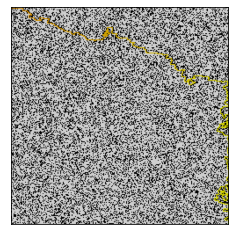

In [19]:
#Check Largest Dimension DFS
p = .3
for dim in range(4,1000):
  for i in range (10):
    fire_set = set([])
    for i in range(dim):
        for j in range(dim):
            if i == 0 and j == 0 or i == dim-1 and j == dim-1:
                continue
            if random.uniform(0,1) < p:
                fire_set.add((i,j))
    print("dimension: ", dim)            
    #plot_fire(fire_set, dim)
    dfs_search(dim, fire_set)

In [1]:
#Probability Density Chart
success = 0
pairs = []
dim = 200
for p in np.arange(0,1,0.01):
  success = 0
  for count in range(50):
    fire_set = set([])
    for i in range(dim):
        for j in range(dim):
            if i == 0 and j == 0 or i == dim-1 and j == dim-1:
                continue
            if random.uniform(0,1) < p:
                fire_set.add((i,j))
    if dfs_search(dim, fire_set) == True:
      success += 1
  pair_to_be_added = (p,success/50)
  pairs.append(pair_to_be_added)
print(pairs)

NameError: ignored

In [4]:
#A*
def euclidean (start,end):
  distance = np.sqrt((start[0]-end[0])^2 + (start[1]-end[1])^2)
  return distance

def A_search(dim, fire_matrix):
    transitions = [(0,-1),(-1,0),(0,1),(1,0)]
    start = (0,0)
    goal = (dim-1, dim-1)
    explored_spaces = set([])
    fringe = [(start, [], euclidean(start,goal))]
    win_flag = False


    while len(fringe) > 0:
      shortest_distance = 10000000000000
      for i in range(len(fringe)):
        node1, shortest_path1, distance1 = fringe.pop(i)
        if distance1 < shortest_distance:
          node, shortest_path, distance = fringe.pop(i)
    
      if node in explored_spaces:
          continue
      if node in fire_set:
          continue
            
      shortest_path.append(node)
    
      if node[0] == goal[0] and node[1] == goal[1]:
          print("You have found the goal")
          win_flag = True
          break

    
      for i in range(len(transitions)):
          dy, dx = transitions[i]
        
          x = node[0] + dx
          y = node[1] + dy
        
          if x < 0 or y < 0 or x > dim-1 or y > dim-1:
                continue
          if (x,y) in explored_spaces:
                continue
          if (x,y) in fire_set:
                continue
          if (x,y) not in fringe:
                fringe.append(((x,y), shortest_path[:]),euclidean((x,y),goal))
       
      explored_spaces.add(node)
        
    if win_flag == False:
        print("There is no path from start to goal")
        return False
    
    
    print("Shortest path: " + str(len(shortest_path)-1))
    path_plot(shortest_path, dim, fire_set)
    return True

In [5]:
#A
A_search(dim, fire_set)

NameError: ignored